This is the GRU results for BTC that are contained in the paper submitted for publishing

In [1]:
import numpy as np
import pandas as pd
import math
import sklearn
import seaborn as sns
import sklearn.preprocessing
import datetime
import os
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import models, layers
from tensorflow import keras
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [2]:
train_btc= pd.read_csv('dataset.csv')

In [15]:
train_btc.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-11-17,388.348999,410.199005,377.502014,387.407990,387.407990,41518800
2014-11-18,387.785004,392.402008,371.117004,375.197998,375.197998,32222500
2014-11-19,373.895996,386.480988,373.895996,380.554993,380.554993,18931800
2014-11-20,380.307007,382.024994,356.781006,357.839996,357.839996,25233200
2014-11-21,357.878998,357.878998,344.112000,350.847992,350.847992,29850100


In [3]:
train_btc["Date"]=pd.to_datetime(train_btc["Date"])
train_btc.set_index('Date', inplace=True)

In [4]:
data = train_btc.filter(['Close'])
dataset = data.values
training_data_len = math.ceil(len(dataset) * .8)
training_data_len

2576

In [5]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler(feature_range=(0,1))
BTC_training_scaled=sc.fit_transform(dataset)

In [6]:
train_data_BTC = BTC_training_scaled[0:training_data_len, :]

In [7]:
x_train_BTC = []
y_train_BTC = []
for i in range(80, len(train_data_BTC)):
    x_train_BTC.append(train_data_BTC[i-80:i, 0])
    y_train_BTC.append(train_data_BTC[i, 0])
x_train_BTC,y_train_BTC=np.array(x_train_BTC), np.array(y_train_BTC)

In [8]:
x_train_BTC = np.reshape(x_train_BTC, (x_train_BTC.shape[0],x_train_BTC.shape[1], 1))

In [9]:
test_data = BTC_training_scaled[training_data_len- 80: ,:]
X_test = []
y_test = dataset[training_data_len: ,:]
for i in range(80, len(test_data)):
  X_test.append(test_data[i-80 : i, 0])

In [10]:
X_test = np.array(X_test)

In [11]:
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [12]:
from tensorflow.keras import models, layers, Sequential

In [13]:
Reg_btc = Sequential()
Reg_btc.add(layers.GRU(60, return_sequences=True, input_shape= (x_train_BTC.shape[1], 1)))
Reg_btc.add(layers.Dropout(0.2))
Reg_btc.add(layers.GRU(60, return_sequences=True))
Reg_btc.add(layers.Dropout(0.2))
Reg_btc.add(layers.GRU(60, return_sequences=True))
Reg_btc.add(layers.Dropout(0.2))
Reg_btc.add(layers.GRU(60))
Reg_btc.add(layers.Dropout(0.2))
Reg_btc.add(layers.Dense(1))

In [14]:
Reg_btc.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru (GRU)                    (None, 80, 60)            11340     
_________________________________________________________________
dropout (Dropout)            (None, 80, 60)            0         
_________________________________________________________________
gru_1 (GRU)                  (None, 80, 60)            21960     
_________________________________________________________________
dropout_1 (Dropout)          (None, 80, 60)            0         
_________________________________________________________________
gru_2 (GRU)                  (None, 80, 60)            21960     
_________________________________________________________________
dropout_2 (Dropout)          (None, 80, 60)            0         
_________________________________________________________________
gru_3 (GRU)                  (None, 60)                2

In [15]:
Reg_btc.compile(optimizer='adam',loss='mean_squared_error')

In [16]:
history = Reg_btc.fit(x_train_BTC, y_train_BTC, batch_size=32,epochs=10)

Train on 2496 samples
Epoch 1/10
2496/2496 [==============================] - 18s 7ms/sample - loss: 0.0063
Epoch 2/10
2496/2496 [==============================] - 2s 946us/sample - loss: 0.0017
Epoch 3/10
2496/2496 [==============================] - 2s 925us/sample - loss: 0.0018
Epoch 4/10
2496/2496 [==============================] - 2s 880us/sample - loss: 0.0015
Epoch 5/10
2496/2496 [==============================] - 2s 940us/sample - loss: 0.0013
Epoch 6/10
2496/2496 [==============================] - 2s 927us/sample - loss: 0.0015
Epoch 7/10
2496/2496 [==============================] - 2s 929us/sample - loss: 0.0013
Epoch 8/10
2496/2496 [==============================] - 2s 958us/sample - loss: 0.0012
Epoch 9/10
2496/2496 [==============================] - 2s 926us/sample - loss: 0.0014
Epoch 10/10
2496/2496 [==============================] - 2s 944us/sample - loss: 0.0011


In [17]:
predictions_1 = Reg_btc.predict(X_test)
predictions_1 = sc.inverse_transform(predictions_1)
len(predictions_1)

643

In [18]:
rmse = np.sqrt(np.mean(predictions_1 - y_test)**2)
rmse

1082.3969203333006

/home/shegun/anaconda3/envs/GPU_Stations/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


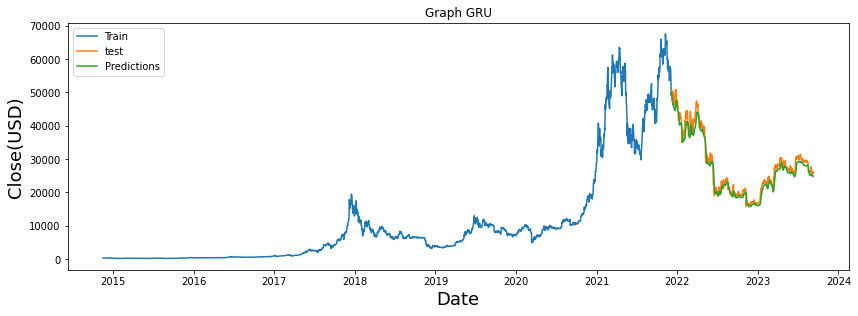

In [19]:
train = train_btc[:training_data_len]

valid_1 = train_btc[training_data_len:]
valid_1['Predictions'] = predictions_1
plt.figure(figsize=(14, 10))
plt.subplot(2, 1, 1)
plt.title('Graph GRU')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close(USD)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid_1[['Close', 'Predictions']])

plt.legend(['Train', 'test', 'Predictions'], loc='upper left')